### Testing

In [ ]:
from ATT_MIL import *
from gensim.models import FastText
from CONSTANTS import *
from utilities import *
from model_utilities import *
import torch
import numpy as np




In [2]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ATT_MIL(N_HEAD, ENCODER_N_LAYERS, EMBEDDING_SIZE, INTERMIDIATE_DIM).to(device)
model.load_state_dict(torch.load("./models/model_weights.pth", map_location=torch.device('cpu')))
model.eval()
ft_model = FastText.load("./models/ft_skipgram.model")

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


### NCBI Test

In [3]:
ncbi_test_file_name="./processed-data-csv/ncbi_cleaned_test_data.csv"
df_test_ncbi=read_data_from_csv(ncbi_test_file_name)


In [ ]:
#ncbi tset 
df_test_ncbi["Class"] = df_test_ncbi["Class"].str.lower()  
test_ncbi_labels = np.array((df_test_ncbi["Class"] != "human").astype(int))

test_ncbi_ids=df_test_ncbi["Virus_ID"]
test_ncbi_seq_ids=df_test_ncbi["Seq_ID"]+" "+df_test_ncbi["Virus_ID"]

# convert test string id to numeric
_,test_ncbi_ids = np.unique(test_ncbi_ids, return_inverse=True)
_,test_ncbi_seq_ids = np.unique(test_ncbi_seq_ids, return_inverse=True)
test_ncbi_datas = df_test_ncbi['Sequence']
print("length of ncbi test ",test_ncbi_datas.shape)


length of ncbi test  (1586,)


100%|██████████| 1586/1586 [00:01<00:00, 1199.92it/s]
902it [00:00, 18300.68it/s]


Start Testing on ncbi test data


Processing Batches:   0%|          | 0/29 [00:00<?, ?it/s]c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\conv.py:370: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Convolution.cpp:1037.)
  return F.conv1d(
Processing Batches: 100%|██████████| 29/29 [00:48<00:00,  1.69s/it]


acc: 98.4%

Classification Report:
              precision    recall  f1-score   support

       Human       0.98      1.00      0.99       642
      Animal       1.00      0.95      0.97       260

    accuracy                           0.98       902
   macro avg       0.99      0.97      0.98       902
weighted avg       0.98      0.98      0.98       902



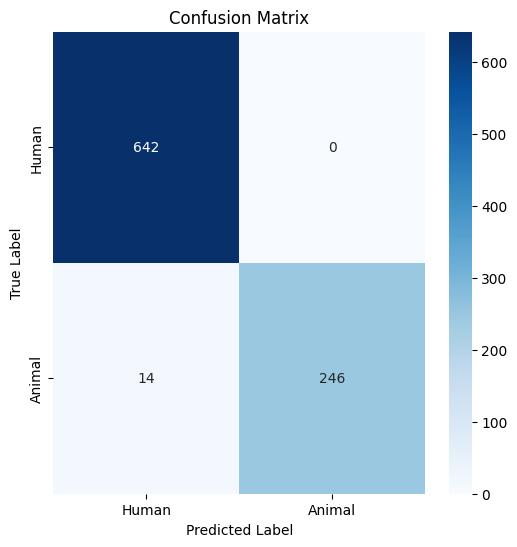

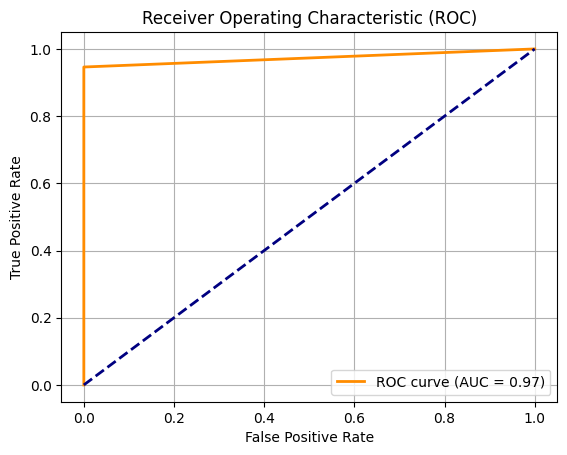

In [6]:
test_ncbi_loader=create_data_loader(test_ncbi_datas,test_ncbi_labels,test_ncbi_ids,test_ncbi_seq_ids,ft_model)
print('Start Testing on ncbi test data')
out=test(model,test_ncbi_loader)


### GASAID Test

In [8]:
gasaid_test_file_name="./processed-data-csv/gasaid_cleaned_test_data.csv"
df_test_gasaid=read_data_from_csv(gasaid_test_file_name)

In [ ]:
#gasaid test
df_test_gasaid["Class"] = df_test_gasaid["Class"].str.lower()  
test_gasaid_labels = np.array((df_test_gasaid["Class"] != "human").astype(int))

test_gasaid_ids=df_test_gasaid["Virus_ID"]
test_gasaid_seq_ids=df_test_gasaid["Seq_ID"]+" "+df_test_gasaid["Virus_ID"]

# convert test string id to numeric
_,test_gasaid_ids = np.unique(test_gasaid_ids, return_inverse=True)
_,test_gasaid_seq_ids = np.unique(test_gasaid_seq_ids, return_inverse=True)
test_gasaid_datas = df_test_gasaid['Sequence']
print("length of gasaid test ",test_gasaid_datas.shape)



length of gasaid test  (5478,)


100%|██████████| 5478/5478 [00:13<00:00, 412.31it/s]
2414it [00:00, 21320.92it/s]


Start Testing on gasaid test data


Processing Batches: 100%|██████████| 76/76 [03:12<00:00,  2.53s/it]


acc: 95.2%

Classification Report:
              precision    recall  f1-score   support

       Human       0.92      0.99      0.96      1273
      Animal       0.99      0.90      0.95      1141

    accuracy                           0.95      2414
   macro avg       0.96      0.95      0.95      2414
weighted avg       0.96      0.95      0.95      2414



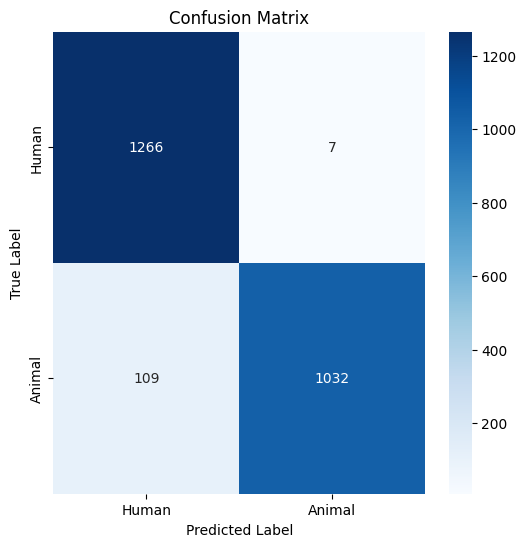

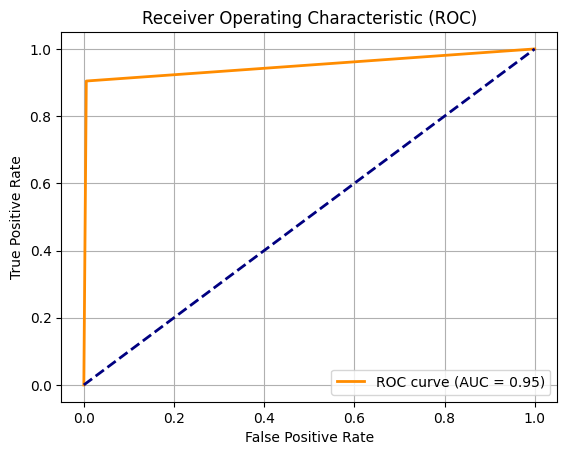

In [10]:
test_gasaid_loader=create_data_loader(test_gasaid_datas,test_gasaid_labels,test_gasaid_ids,test_gasaid_seq_ids,ft_model)
print('Start Testing on gasaid test data')
out2=test(model,test_gasaid_loader)

### COVID-19 Test

In [11]:
covid_test_file_name="./processed-data-csv/test_covid.csv"
df_test_covid=read_data_from_csv(covid_test_file_name)

In [ ]:
#covid tset 
df_test_covid["Class"] = df_test_covid["Class"].str.lower()  
test_covid_labels = np.array((df_test_covid["Class"] != "human").astype(int))

test_covid_ids=df_test_covid["Virus_ID"]
test_covid_seq_ids=df_test_covid["Seq_ID"]+" "+df_test_covid["Virus_ID"]

# convert test string id to numeric
_,test_covid_ids = np.unique(test_covid_ids, return_inverse=True)
_,test_covid_seq_ids = np.unique(test_covid_seq_ids, return_inverse=True)
test_covid_datas = df_test_covid['Sequence']
print("length of covid test ",test_covid_datas.shape)


length of covid test  (55,)


100%|██████████| 55/55 [00:00<?, ?it/s]
8it [00:00, ?it/s]


Start Testing on covid test data


Processing Batches: 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to cont

acc: 87.5%

Classification Report:
              precision    recall  f1-score   support

       Human       1.00      0.88      0.93         8
      Animal       0.00      0.00      0.00         0

    accuracy                           0.88         8
   macro avg       0.50      0.44      0.47         8
weighted avg       1.00      0.88      0.93         8



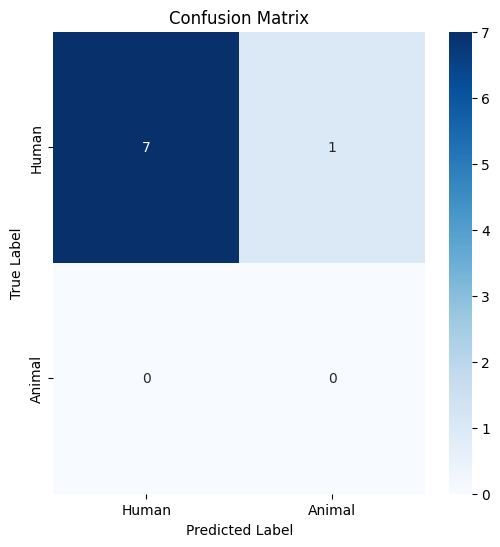

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


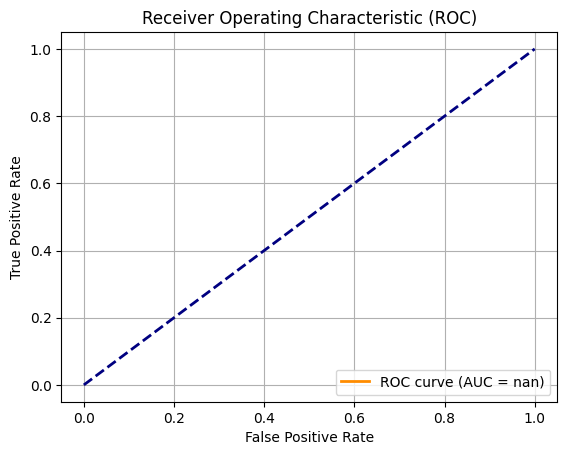

In [13]:
test_covid_loader=create_data_loader(test_covid_datas,test_covid_labels,test_covid_ids,test_covid_seq_ids,ft_model)
print('Start Testing on covid test data')
out=test(model,test_covid_loader)
